In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir('C:\\Sohan\\ML_Acmegrade\\ML Day14 5\\')
dataset = pd.read_csv('Mall_Customers.csv')
dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = dataset.iloc[:,[3,4]].values
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [4]:
# To Check how many clusters to be created 
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++')
    kmeans.fit(x)
    wcss.append (kmeans.inertia_)
wcss


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30566.45113025186,
 25041.84962356484,
 21830.041978049438,
 19676.6125856028]

Text(0, 0.5, 'wcss')

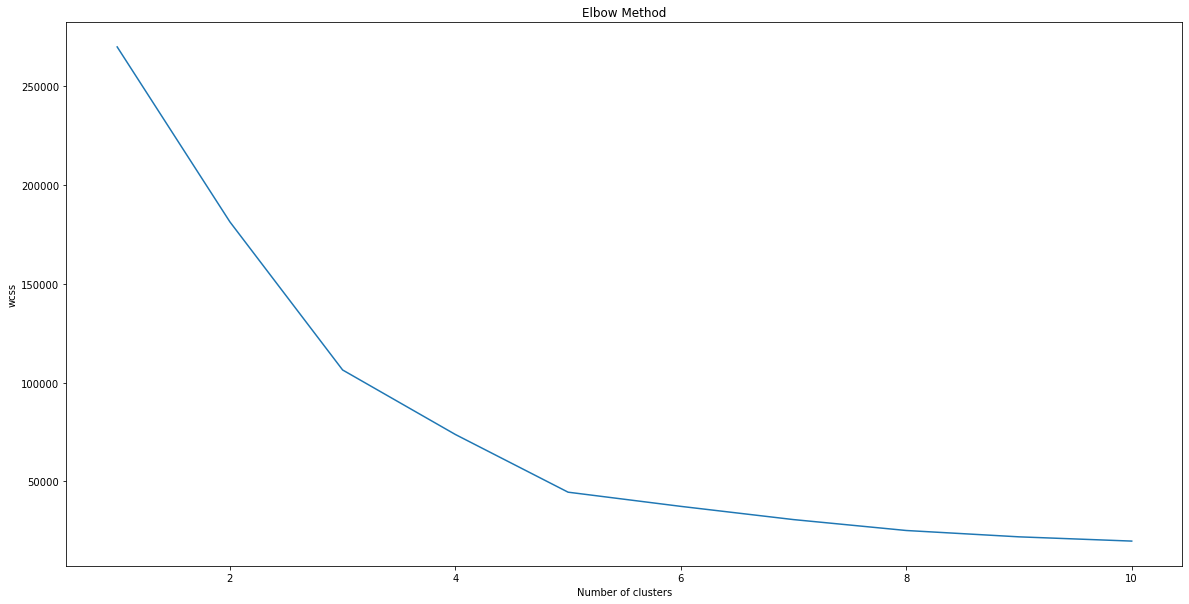

In [5]:
plt.figure(figsize=(20, 10))
plt.plot (range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')
#from this we can detect elbow pt, which by approx is 5

In [6]:
kmeans =  KMeans (n_clusters =  5 , init = 'k-means++')
kmeans = kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans
#here 0-cluster0,1-cluster1,2-cluster2 so on

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

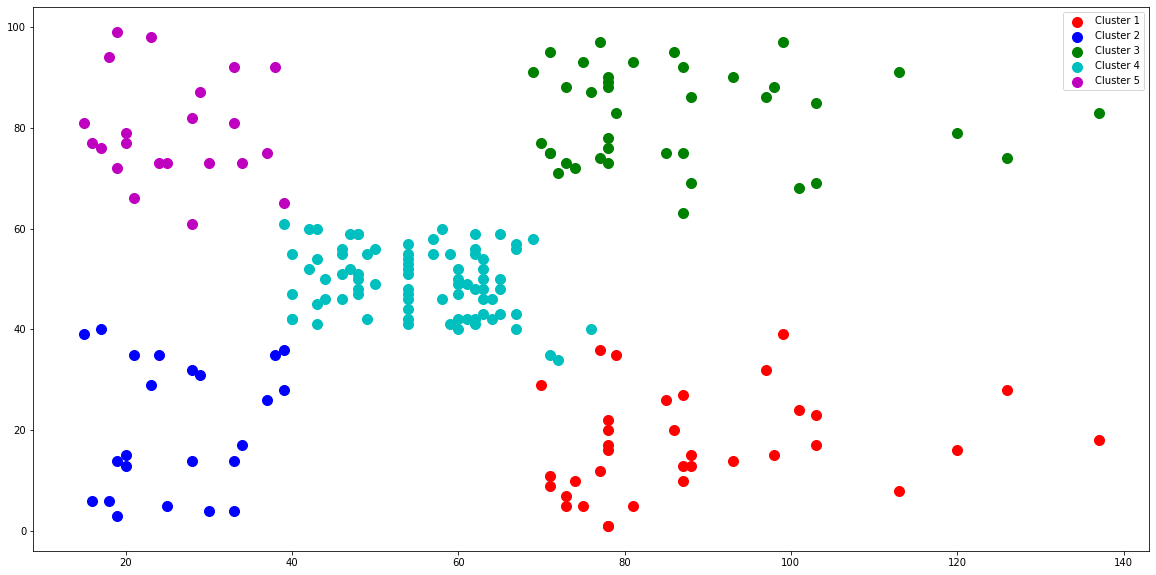

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100, c='g', label = 'Cluster 3')
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.scatter (x[y_kmeans == 4,0],x[y_kmeans == 4,1] ,s = 100, c='m', label = 'Cluster 5')
plt.legend()


In [8]:
result = pd.concat ([dataset, pd.DataFrame(y_kmeans)],axis =1)
result.to_excel ('C:\\Sohan\\ML_Acmegrade\\ML Day14 5\\K Means Mall Customers.xlsx')
result


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
